<a href="https://colab.research.google.com/github/GitMishka/1/blob/main/Blob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download
from google.colab import files



In [ ]:
download('vader_lexicon')

uploaded = files.upload()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Saving all_data.csv to all_data.csv


In [ ]:


data = pd.read_csv('all_data.csv')

filtered_data = data[data['Q2 - What can we do better?'].notna()]

sia = SentimentIntensityAnalyzer()
filtered_data['Sentiment'] = filtered_data['Q2 - What can we do better?'].apply(lambda x: sia.polarity_scores(x)['compound'])

negative_comments = filtered_data[filtered_data['Sentiment'] < 0]['Q2 - What can we do better?']

#print(negative_comments)

<ipython-input-14-669d0dc56966>:2: DtypeWarning: Columns (18,23,24,26,27,31,33,34,38,39,40,41,42,43,44,45,47,48,50,51,52,54,55,56,57,59,60,82,99,100,101,102,103,104,108,109,111,112,113,114,115,116,117,119,121,124,126,127,128,129,130,131,132,135,136,137,139,141,142,145,146,151,152,153,154) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('all_data.csv')
<ipython-input-14-669d0dc56966>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Sentiment'] = filtered_data['Q2 - What can we do better?'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [ ]:
categories = {
    'Training': ['training', 'skills', 'learning'],
    'Work Environment': ['environment', 'workspace', 'colleagues'],
    'Compensation': ['pay', 'salary', 'wage', 'compensation'],
    'Team Dynamics': ['team', 'colleague', 'coworker', 'collaborate', 'teamwork'],
    'Leadership': ['manager', 'leader', 'management', 'direction', 'boss'],
    'Work-Life Balance': ['hours', 'overtime', 'work-life balance', 'time off', 'vacation'],
    'Opportunities for Growth': ['growth', 'promotion', 'development', 'training', 'career'],
    'Recognition': ['acknowledgment', 'recognition', 'value', 'reward', 'appreciation'],
    'Resources & Tools': ['tools', 'software', 'technology', 'resource', 'equipment'],
    'Benefits & Compensation': ['salary', 'pay', 'benefit', 'bonus', 'compensation', 'health', 'insurance'],
    'Company Culture': ['culture', 'values', 'mission', 'ethics', 'environment'],
    'Job Security': ['security', 'layoff', 'stability', 'future', 'position'],
    'Communication': ['communicate', 'information', 'clarity', 'understand', 'role'],
    'Diversity & Inclusion': ['diversity', 'inclusion', 'race', 'gender', 'equality', 'bias'],
    'Workload': ['workload', 'busy', 'overwhelm', 'stress', 'pressure']
}

def categorize_feedback(feedback):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in feedback.lower():
                return category
    return 'Other'
filtered_data['Category'] = filtered_data['Q2 - What can we do better?'].apply(categorize_feedback)

<ipython-input-17-ab6f2528c5b2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Category'] = filtered_data['Q2 - What can we do better?'].apply(categorize_feedback)


In [ ]:
category_counts = filtered_data['Category'].value_counts()
print(category_counts)


Other                      157
Compensation                54
Leadership                  49
Team Dynamics               17
Training                    14
Work Environment             7
Benefits & Compensation      5
Communication                4
Work-Life Balance            4
Workload                     4
Job Security                 3
Recognition                  2
Resources & Tools            1
Name: Category, dtype: int64


In [ ]:
grouped = filtered_data.groupby('Category').agg(
    total_comments=pd.NamedAgg(column='Q2 - What can we do better?', aggfunc='count'),
    average_sentiment=pd.NamedAgg(column='Sentiment', aggfunc='mean'),
    most_negative_comment=pd.NamedAgg(column='Sentiment', aggfunc='idxmin')
)

grouped['most_negative_comment'] = grouped['most_negative_comment'].apply(lambda idx: filtered_data.at[idx, 'Q2 - What can we do better?'] if pd.notna(idx) else None)

print(grouped)


                         total_comments  average_sentiment  \
Category                                                     
Benefits & Compensation               5           0.288540   
Communication                         4           0.402650   
Compensation                         54           0.206363   
Job Security                          3           0.166433   
Leadership                           49           0.157202   
Other                               157           0.067046   
Recognition                           2          -0.015600   
Resources & Tools                     1           0.000000   
Team Dynamics                        17           0.334941   
Training                             14           0.301329   
Work Environment                      7          -0.103086   
Work-Life Balance                     4          -0.100075   
Workload                              4          -0.165250   

                                                     most_negative_co

In [ ]:
comments_and_categories = filtered_data[['Q2 - What can we do better?', 'Category']]
print(comments_and_categories)


                             Q2 - What can we do better?  \
6                    Not use PTO when you work a holiday   
9      Enforce job descriptions to department head. H...   
14     My salary is way too low given my qualifications    
24     It would nice if ex director would act if you ...   
26     Understand that your staff are humans too, we ...   
...                                                  ...   
10283  The management is the problem. They tell us to...   
10286                                      Communication   
10293  Training, Communication and Treating Employees...   
10317                  I'm Driving\n\n- Sent from MY CAR   
10383               Be honest and operate with integrity   

                      Category  
6                        Other  
9                        Other  
14                Compensation  
24                       Other  
26     Benefits & Compensation  
...                        ...  
10283               Leadership  
10286          

In [ ]:
comments_and_categories.to_csv('categorized_comments.csv', index=False)


In [ ]:
from google.colab import files
files.download('categorized_comments.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

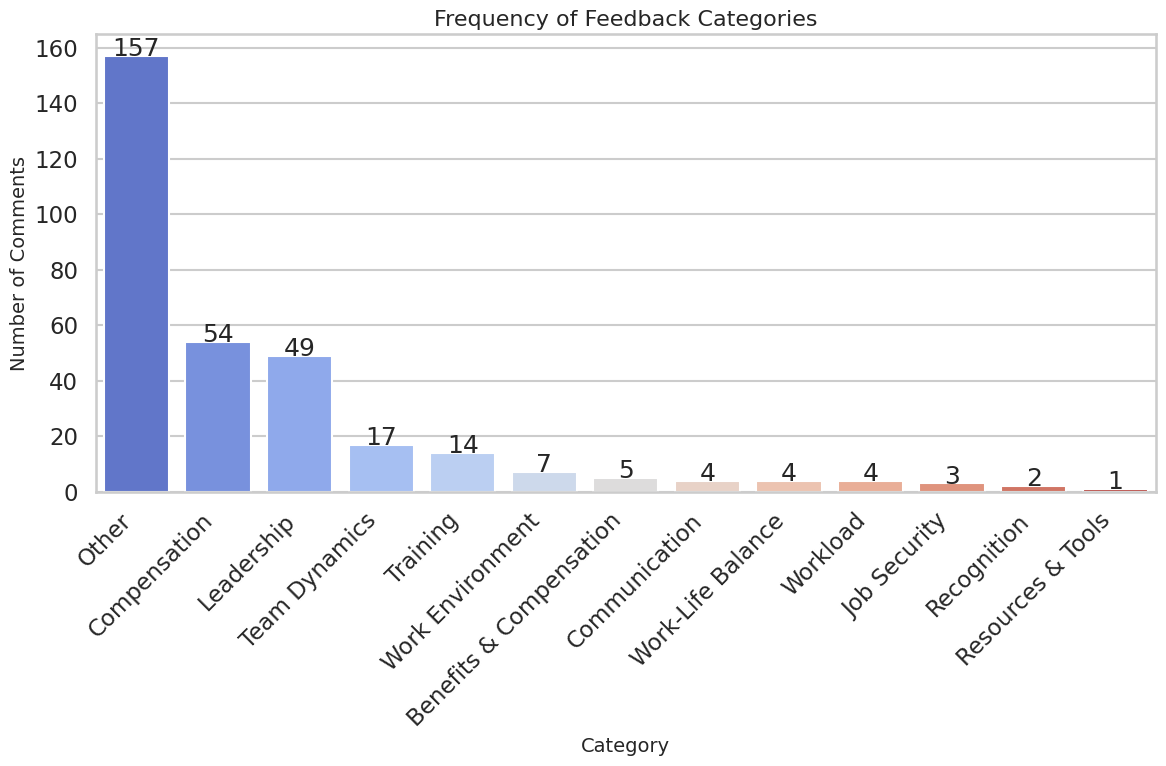

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = filtered_data['Category'].value_counts()

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(12, 8))

palette = sns.color_palette("coolwarm", len(category_counts))

bars = sns.barplot(x=category_counts.index, y=category_counts.values, palette=palette)

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                 (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.title('Frequency of Feedback Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [ ]:
priority_categories = category_counts.sort_values(ascending=False)
print(priority_categories)


Other                      157
Compensation                54
Leadership                  49
Team Dynamics               17
Training                    14
Work Environment             7
Benefits & Compensation      5
Communication                4
Work-Life Balance            4
Workload                     4
Job Security                 3
Recognition                  2
Resources & Tools            1
Name: Category, dtype: int64


In [ ]:
top_category = priority_categories.index[0]
top_comments = filtered_data[filtered_data['Category'] == top_category]['Q2 - What can we do better?']
print(top_comments)


6                      Not use PTO when you work a holiday
9        Enforce job descriptions to department head. H...
24       It would nice if ex director would act if you ...
29                                                 Not lie
41       Make staff accountable for their actions and p...
                               ...                        
10271    The company itself is great but my community i...
10276                                   Quite a few things
10286                                        Communication
10317                    I'm Driving\n\n- Sent from MY CAR
10383                 Be honest and operate with integrity
Name: Q2 - What can we do better?, Length: 157, dtype: object


In [ ]:
negative_comments = filtered_data[filtered_data['Sentiment'] < -0.5]
negative_comments.to_csv('negative_feedback.csv', columns=['Contact Fields - Recipient Email', 'Q2 - What can we do better?', 'Category'], index=False)


In [ ]:
training_issues = len(filtered_data[filtered_data['Category'] == 'Training'])
print(f"There are {training_issues} comments related to Training that need to be addressed.")


There are 14 comments related to Training that need to be addressed.


In [ ]:
old_data = pd.read_csv('all_data.csv')
old_counts = old_data['Q2 - What can we do better?'].value_counts()
comparison = pd.DataFrame({'Old': old_counts, 'New': category_counts}).fillna(0)
print(comparison)


                                                    Old  New
5                                                   1.0  0.0
8                                                   1.0  0.0
A 42 cent raise? Really???? For someone who has...  1.0  0.0
A different person to do the schedule               1.0  0.0
A lot                                               1.0  0.0
...                                                 ...  ...
new leadership (ED). She's a bad fit for this o...  1.0  0.0
nothing                                             1.0  0.0
offer better pay. a lot of us have picked up ex...  1.0  0.0
proper Investigation of what is actually going ...  1.0  0.0
• Be more open with staff about changes that ar...  1.0  0.0

[324 rows x 2 columns]


<ipython-input-34-6e6d383b3636>:1: DtypeWarning: Columns (18,23,24,26,27,31,33,34,38,39,40,41,42,43,44,45,47,48,50,51,52,54,55,56,57,59,60,82,99,100,101,102,103,104,108,109,111,112,113,114,115,116,117,119,121,124,126,127,128,129,130,131,132,135,136,137,139,141,142,145,146,151,152,153,154) have mixed types. Specify dtype option on import or set low_memory=False.
  old_data = pd.read_csv('all_data.csv')
